In [1]:
print("hello to check")

hello to check


In [2]:
import numpy as np
import matplotlib.pyplot as plt
#import pygame

import keras
from keras.datasets import mnist

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

2023-06-02 20:04:17.806806: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
mnist.load_data

<function keras.datasets.mnist.load_data(path='mnist.npz')>

In [4]:
(X_train, y_train), (X_test, y_test)=mnist.load_data()
X_train.shape , y_train.shape , X_test.shape ,y_test.shape

11490434/11490434 [==============================] - 2s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [5]:
def plot_input_img(i):
    plt.imshow(X_train[i] , cmap='binary')
    plt.title(y_train[i])
    plt.axis('off')
    plt.show()

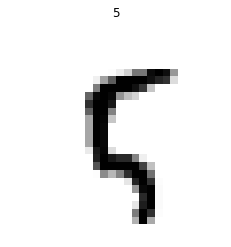

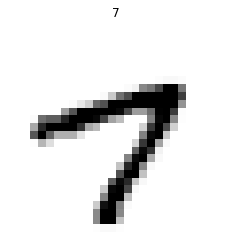

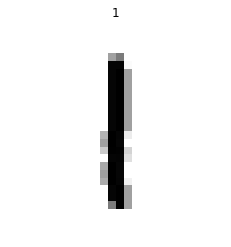

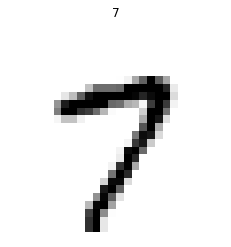

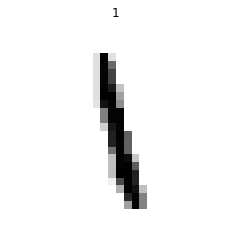

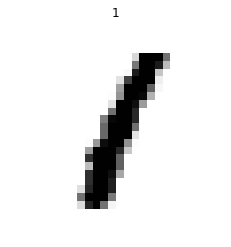

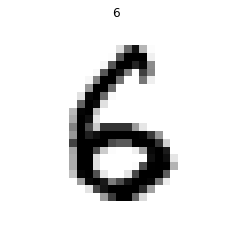

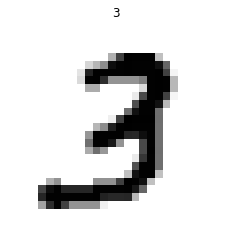

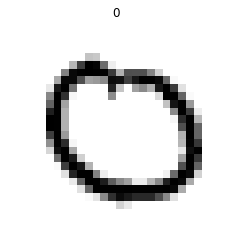

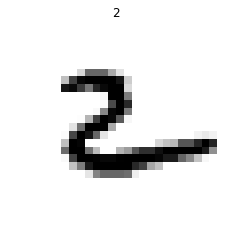

In [6]:
for i in range(100,110):
    plot_input_img(i)


In [7]:
#pre process data
X_train = X_train.astype(np.float32)/255
X_test = X_test.astype(np.float32)/255
#reshape or expand the dimentions of images to (28,28)
X_train = np.expand_dims(X_train,-1)
X_test = np.expand_dims(X_test,-1)


In [8]:
#convert classes to one hot vector
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [9]:
model = Sequential()

model.add(Conv2D(32,(3,3),input_shape = (28,28,1) , activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64,(3,3) , activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(10,activation="softmax"))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [11]:
model.compile(optimizer='adam',loss=keras.losses.binary_crossentropy,metrics=['accuracy'])

In [12]:
#callbacks

from keras.callbacks import EarlyStopping, ModelCheckpoint
#earlystopping
es= EarlyStopping(monitor='accuracy', min_delta=0.01,patience=4, verbose=1 )
#model check point
mc=ModelCheckpoint("./bestmodel.h5",monitor="accuracy",verbose=1,save_best_only=True)

cb = [es,mc]

In [13]:
#model train
his=model.fit(X_train, y_train , epochs=5, validation_split=0.3, callbacks=cb)

Epoch 1/5
1310/1313 [============================>.] - ETA: 0s - loss: 0.0586 - accuracy: 0.9156
Epoch 1: accuracy improved from -inf to 0.91564, saving model to ./bestmodel.h5
1313/1313 [==============================] - 21s 15ms/step - loss: 0.0586 - accuracy: 0.9156 - val_loss: 0.0216 - val_accuracy: 0.9743
Epoch 2/5
1312/1313 [============================>.] - ETA: 0s - loss: 0.0191 - accuracy: 0.9786
Epoch 2: accuracy improved from 0.91564 to 0.97857, saving model to ./bestmodel.h5
1313/1313 [==============================] - 21s 16ms/step - loss: 0.0191 - accuracy: 0.9786 - val_loss: 0.0143 - val_accuracy: 0.9839
Epoch 3/5
1312/1313 [============================>.] - ETA: 0s - loss: 0.0143 - accuracy: 0.9847
Epoch 3: accuracy improved from 0.97857 to 0.98471, saving model to ./bestmodel.h5
1313/1313 [==============================] - 19s 15ms/step - loss: 0.0143 - accuracy: 0.9847 - val_loss: 0.0113 - val_accuracy: 0.9864
Epoch 4/5
1311/1313 [============================>.] - ETA

model_S=keras.models.load_model("D://programming//New folder//bestmodel.h5")

score = model_S.evaluate(X_test,y_test)
print(f",odel accuracy is {score[1]}")

In [ ]:
#model accuracy improved